<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>

# CNN

Vamos a buscar mejorar el modelo de la clase pasada, utilizando una <y>CNN</y> <pr>Redes Neuronales Convolucionales (Convolutional Neural Networks)</pr>.

Les recomiendo activar la GPU para que este notebook corra más rápido (sobre todo la parte de entrenamiento del modelo)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.datasets import mnist

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>

Primero cargarmos <y>MINST</y>.  
<pr>"Instituto Nacional de Estándares y Tecnología Modificado"(Modified National Institute of Standards and Technology)</pr>  
Hay que tener en cuenta que las layers Conv2D de tensorflow esperan recibir como input shape algo de la forma:  
<pr>(muestras, alto img, ancho img, canales).</pr>

En este caso trabajamos con imagenes en blanco y negro por lo que constan de 1 solo canal.

Eso lo especificamos en el siguiente reshape.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(*X_train.shape, 1) # Se formatea (registros,ancho,alto,canales)
X_test = X_test.reshape(*X_test.shape, 1)
X_train.shape

(60000, 28, 28, 1)

En redes neuronales, es bueno escalar los datos. Llevamos todo a valores entre 0 y 1:

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Aplicamos one hot encoder como la clase pasada:

In [7]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse=False)
# y_train = ohe.fit_transform(y_train.reshape(-1, 1))
# y_test = ohe.transform(y_test.reshape(-1, 1))

# Lo hago con las utilidades
from tensorflow.keras.utils import to_categorical

yh_train=to_categorical(y_train,num_classes=10)
yh_test=to_categorical(y_test,num_classes=10)
yh_test[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
y_test[0:2]

array([7, 2], dtype=uint8)

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

<style>
pr { color: Peru }
s { color: Salmon }
o { color: Orange }
y { color: Yellow }
</style>

Ahora vamos a definir el modelo.

EJERCICIO: 

Definir una <pr>CNN</pr> de la siguiente manera:

- Capa <pr>Conv2D</pr> de 32 neuronas, filtro de 3x3, activación relu. Recuerden que deben definir también el input shape en esta capa.

- Capa <pr>MaxPooling2D</pr> con filtro de 2x2

- Capa Conv2D de 64 neuronas, filtro de 3x3 y activación relu

- Capa Max pooling de 2x2  
    
Fórmula para calcular la dimensión de la matriz de salida:  
$$\text{Dimensión de salida} = \frac{n + 2p - f}{s} + 1$$

Donde:

$n$ es el tamaño de la matriz de entrada.

$f$ es el tamaño del filtro.

$s$ es el tamaño del stride.

$p$ es el tamaño del padding.  

Fórmula para calcular la cantidad de parámetros de cada capa:
$$\text{Conv2D} = neuronas\cdot (f \cdot f + 1)$$
$$\text{Pooling} = 0$$
$$\text{Dense} = (flatten +1)\cdot \text{neuronas dense}$$ 


In [12]:
#COMPLETAR

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
])

Podemos ver como quedo nuestro modelo hasta ahora:  

Si definieron todo bien, deberían ver una tabla como esta:

```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
=================================================================
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________

```



In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ahora, en la tabla anterior pordemos ver las dimensiones de salida de cada capa.

Teniendo esto en cuenta, agregar al modelo:

- Flatten para aplanar la salida
- Una capa densa de 64 neuronas con activación relu
- La capa de salida: ¿Cómo debe ser esta capa? ¿De qué tipo? ¿Cuántas neuronas? ¿Qué función de activación?

In [14]:
#COMPLETAR
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

Ahora entrenamos el modelo:

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
history = model.fit(X_train, yh_train, epochs=10, validation_split=0.20, verbose=False)

Visualizamos métricas

313/313 - 0s - loss: 0.0400 - accuracy: 0.9899 - 398ms/epoch - 1ms/step


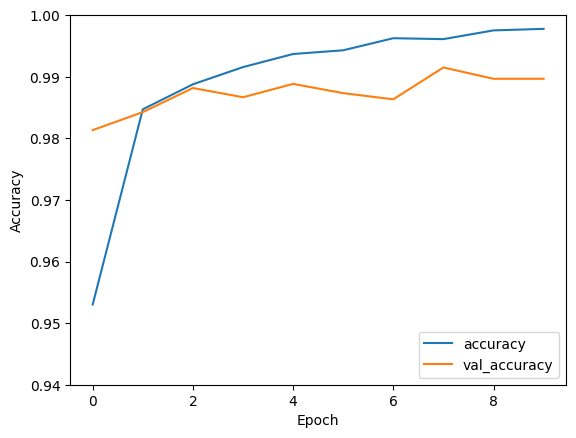

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  yh_test, verbose=2)

In [23]:
print(test_acc)

0.9898999929428101


Pueden jugar agregando o quitando capas al modelo

In [28]:
yp=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [30]:
display(yp[0])
display(yp[0].argmax())

array([7.7198292e-16, 3.1020054e-13, 3.1861553e-12, 2.4657995e-10,
       1.7197610e-14, 2.1275673e-13, 2.0643674e-21, 1.0000000e+00,
       7.6947299e-14, 2.0412769e-11], dtype=float32)

7

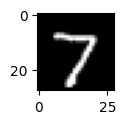

In [31]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))
plt.show()

In [51]:
from keras.callbacks import LearningRateScheduler

# Definir la función de programación de la tasa de aprendizaje
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1
    
# Crear el modelo
model2 = Sequential([
    Conv2D(64, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo con el optimizador y la función de pérdida adecuados
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Definir el programador de la tasa de aprendizaje
lr_scheduler = LearningRateScheduler(lr_schedule)

# Entrenar el modelo con el programador de la tasa de aprendizaje
history2 = model2.fit(X_train, yh_train, epochs=15, validation_split=0.2,callbacks=[lr_scheduler],verbose=False)

313/313 - 1s - loss: 0.0277 - accuracy: 0.9919 - 716ms/epoch - 2ms/step


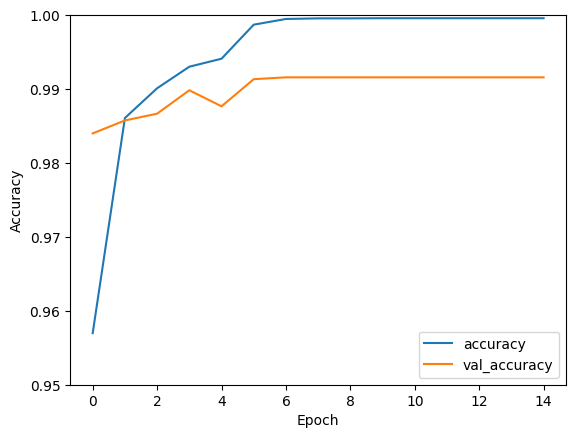

In [53]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  yh_test, verbose=2)

In [39]:
print(test_acc)

0.9887999892234802
